
O grafo é um produto corona!



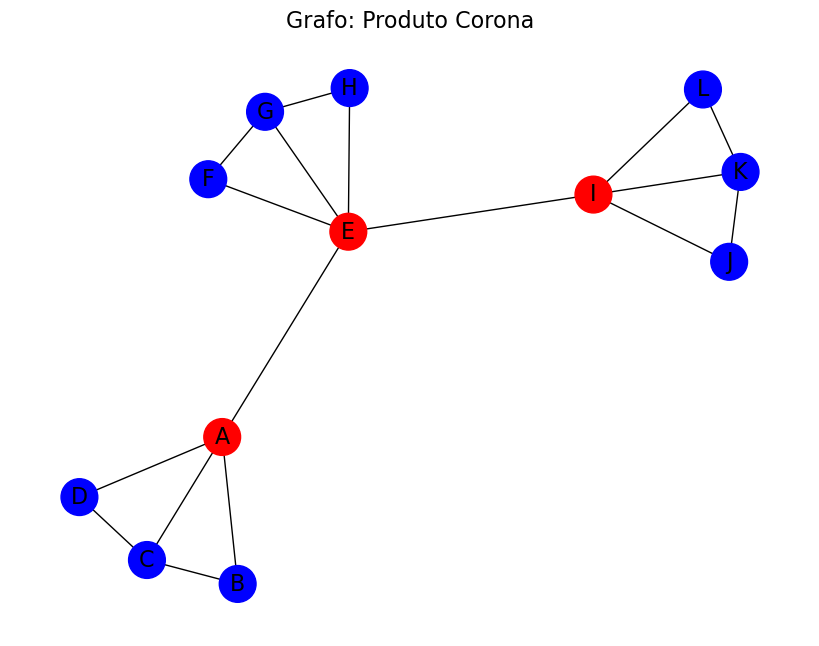

É um produto corona?


In [147]:
import networkx as nx
import matplotlib.pyplot as plt

class Grafo:
    def __init__(self, vertices):
        self.vertices = vertices  # lista de vértices
        self.arestas = {v: [] for v in vertices}  # dicionário de adjacências

    def adicionar_aresta(self, u, v):
        self.arestas[u].append(v)
        self.arestas[v].append(u)  # grafo não direcionado

    def grau(self, v):
        return len(self.arestas[v])

    def subgrafo(self, vertices):
        """Retorna o subgrafo induzido pelos vértices dados"""
        sub_arestas = {v: [] for v in vertices}
        for v in vertices:
            for vizinho in self.arestas[v]:
                if vizinho in vertices:
                    sub_arestas[v].append(vizinho)
        return sub_arestas

    def desenhar_grafo(self, N, C, resultado):
        """Desenha o grafo, destacando o núcleo e as cópias."""
        G = nx.Graph()

        for v in self.vertices:
            G.add_node(v)

        for u in self.arestas:
            for v in self.arestas[u]:
                G.add_edge(u, v)

        # Definindo as cores
        cores = []
        for v in self.vertices:
            if v in N:
                cores.append('red')  # Núcleo em vermelho
            else:
                cores.append('blue')  # Conjuntos de cópias em azul

        # Desenhar o grafo
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(G)  # Posição dos nós
        nx.draw(G, pos, with_labels=True, node_color=cores, node_size=700, font_size=16)
        plt.title("Grafo: " + ("Produto Corona" if resultado else "Não é um Produto Corona"), fontsize=16)
        plt.show()

def encontrar_nucleo_corona(grafo, graus):
    vertices_nucleo = []
    vertice_maior_grau = encontrar_vertice_maior_grau(graus)
    grau_maximo = graus[vertice_maior_grau]

    # Primeiro, procurar vizinhos com o mesmo grau
    vizinhos_mesmo_grau = [vizinho for vizinho in grafo[vertice_maior_grau] if graus[vizinho] == grau_maximo]

    # Se houver vizinhos com o mesmo grau, esses formam o núcleo
    if vizinhos_mesmo_grau:
        vertices_nucleo.extend(vizinhos_mesmo_grau)
        
        # adicionar os vizinhos dos vizinhos com o mesmo grau
        for vizinho in vizinhos_mesmo_grau:
            vizinhos_dos_vizinhos = [v for v in grafo[vizinho] if graus[v] == grau_maximo and v != vertice_maior_grau]
            vertices_nucleo.extend(vizinhos_dos_vizinhos)

    else:
        # Se não houver, procurar vizinhos com grau menor por 1
        vizinhos_grau_menor = [vizinho for vizinho in grafo[vertice_maior_grau] if graus[vizinho] == grau_maximo - 1]
        vertices_nucleo.extend(vizinhos_grau_menor)

    # Adicionar o vértice de maior grau ao núcleo
    if vertices_nucleo:
        vertices_nucleo.append(vertice_maior_grau)
        
    return list(set(vertices_nucleo))  # Remover duplicatas

# Função auxiliar para encontrar o vértice com maior grau
def encontrar_vertice_maior_grau(graus):
    return max(graus, key=graus.get)

# Função para converter subgrafo em formato NetworkX
def subgrafo_para_networkx(subgrafo):
    G = nx.Graph()
    for v, vizinhos in subgrafo.items():
        for vizinho in vizinhos:
            G.add_edge(v, vizinho)
    return G

def produto_corona(grafo):
    # Passo 1: Inicializar núcleo e dicionário de cópias
    N = set()  # Conjunto Núcleo
    C = {}     # Dicionário de conjuntos de cópias

    # Passo 2: Calcular graus
    graus = {v: grafo.grau(v) for v in grafo.vertices}

    # Passo 3: Usar a nova lógica para selecionar o núcleo
    vertices_nucleo = encontrar_nucleo_corona(grafo.arestas, graus)
    N.update(vertices_nucleo)
    for v in N:
        C[v] = set()

    # Passo 4: Distribuir os vértices restantes nos conjuntos de cópias
    for u in grafo.vertices:
        if u not in N:
            conexoes_nucleo = [n for n in N if u in grafo.arestas[n]]
            
            # Se o vértice tiver mais de uma conexão com o núcleo, não é um produto corona
            if len(conexoes_nucleo) > 1:
                print(f"\nO vértice {u} possui conexões com mais de um vértice do núcleo: {conexoes_nucleo}.")
                print(f"Por isso, o grafo NÃO é um produto corona.\n")
                grafo.desenhar_grafo(N, C, False)
                return False  # Não é um produto corona

            # Adiciona o vértice u à cópia do vértice no núcleo correspondente
            if conexoes_nucleo:
                C[conexoes_nucleo[0]].add(u)

    # Passo 5: Comparar os subgrafos de cada conjunto de cópias
    copia_ref = None
    for n in N:
        subgrafo_atual = grafo.subgrafo(C[n])
        G_atual = subgrafo_para_networkx(subgrafo_atual)

        if copia_ref is None:
            copia_ref = G_atual
        else:
            if not nx.is_isomorphic(copia_ref, G_atual):
                print(f"\nAs cópias associadas ao vértice {n} no núcleo e outro vértice não são isomorfas.")
                print("Por isso, o grafo NÃO é um produto corona.\n")
                grafo.desenhar_grafo(N, C, False)
                return False  # Não é um produto corona

    print("\nO grafo é um produto corona!\n")
    grafo.desenhar_grafo(N, C, True)
    return True  # É um produto corona

# Exemplo de uso:
vertices = ['A', 'B', 'C', 'D', "E", "F", "G", "H", "I", "J", "K", "L"]
grafo = Grafo(vertices)
grafo.adicionar_aresta('A', 'B')
grafo.adicionar_aresta('A', 'C')
grafo.adicionar_aresta('A', 'D')
grafo.adicionar_aresta('B', 'C')
grafo.adicionar_aresta('C', 'D')

grafo.adicionar_aresta('A', 'E')
grafo.adicionar_aresta('E', 'F')
grafo.adicionar_aresta('E', 'G')
grafo.adicionar_aresta('E', 'H')
grafo.adicionar_aresta('F', 'G')
grafo.adicionar_aresta('G', 'H')

grafo.adicionar_aresta('E', 'I')
grafo.adicionar_aresta('I', 'J')
grafo.adicionar_aresta('I', 'K')
grafo.adicionar_aresta('I', 'L')
grafo.adicionar_aresta('J', 'K')
grafo.adicionar_aresta('K', 'L')

# Verificar se é um produto corona
resultado = produto_corona(grafo)
print("É um produto corona?" if resultado else "Não é um produto corona")




Teste 1:

O grafo é um produto corona!



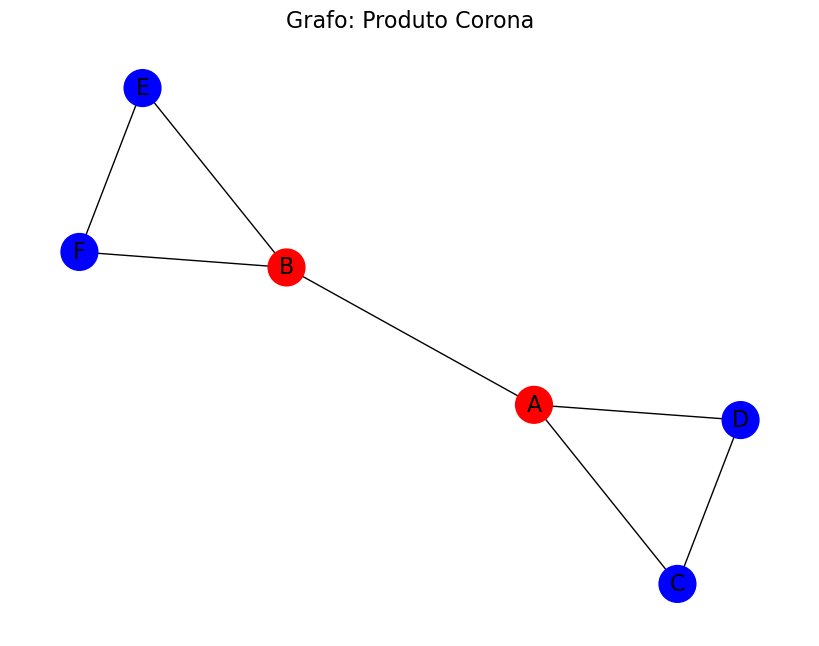


Teste 2:

O grafo é um produto corona!



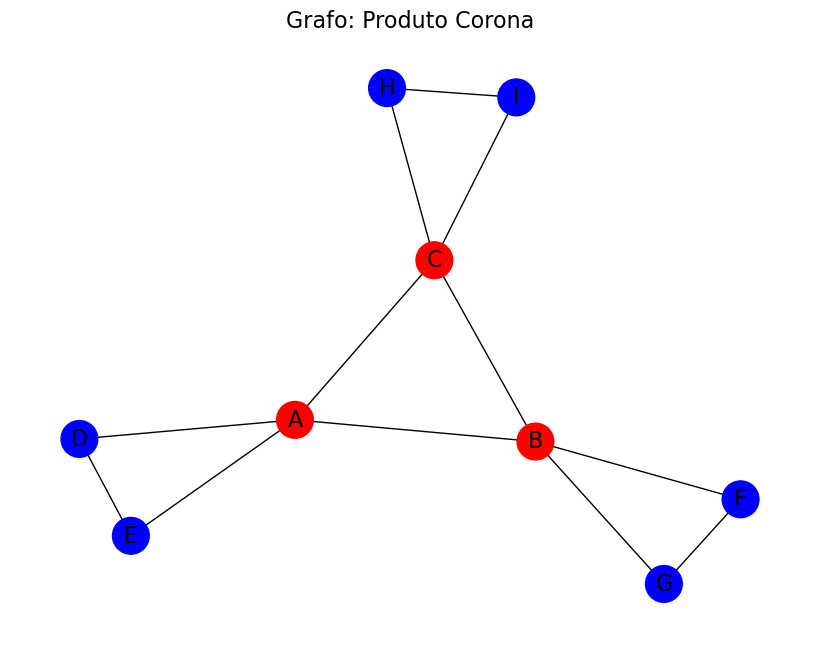

Caso 3: Ciclo de 4 no núcleo e ciclo de 4 na cópia

O grafo é um produto corona!



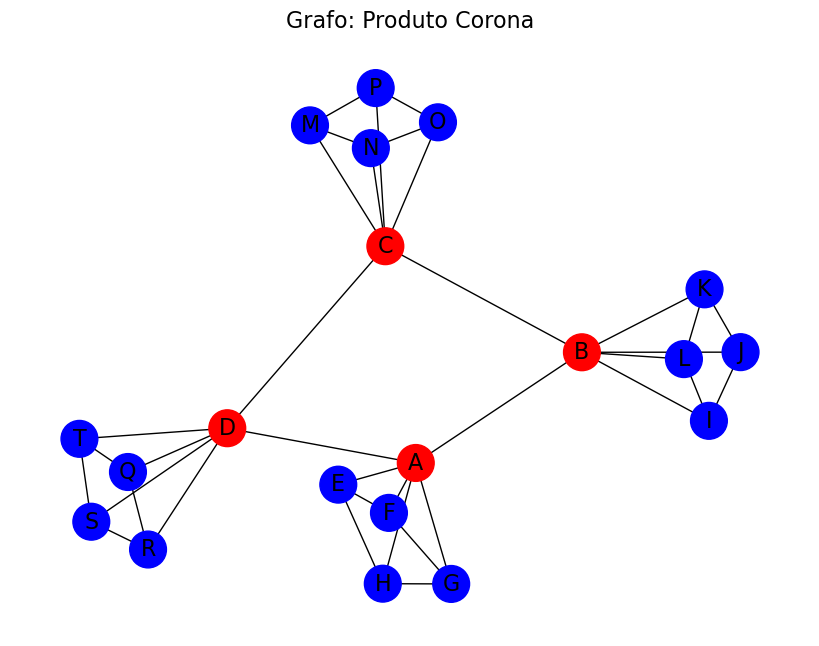

Caso 4: Grafo completo de 4 no núcleo e caminho de 2 na cópia

O grafo é um produto corona!



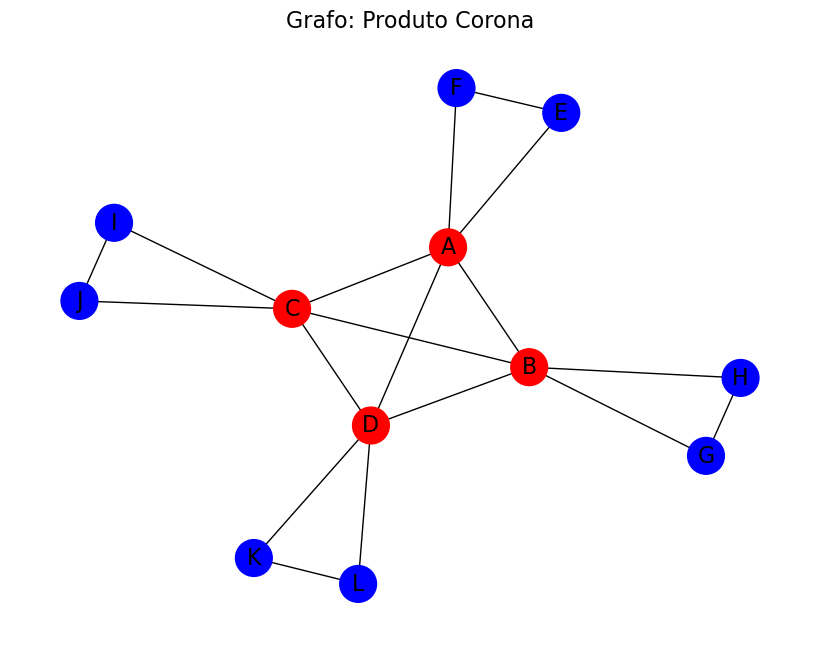

True

In [148]:
# Teste 1: Caminho de 2 vértices no núcleo; Caminho de 2 vértices na cópia; Uma cópia para cada vértice

vertices_teste1 = ['A', 'B', 'C', 'D', 'E', 'F']
grafo_teste1 = Grafo(vertices_teste1)

# Núcleo: Caminho de 2 vértices
grafo_teste1.adicionar_aresta('A', 'B')

# Cópias: Caminho de 2 vértices (uma cópia para cada vértice do núcleo)
grafo_teste1.adicionar_aresta('A', 'C')
grafo_teste1.adicionar_aresta('A', 'D')
grafo_teste1.adicionar_aresta('C', 'D')
grafo_teste1.adicionar_aresta('B', 'E')
grafo_teste1.adicionar_aresta('B', 'F')
grafo_teste1.adicionar_aresta('E', 'F')

print("\nTeste 1:")
produto_corona(grafo_teste1)

# Teste 2: Ciclo de 3 vértices no núcleo; Caminho de 2 vértices na cópia; Uma cópia para cada vértice

vertices_teste2 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
grafo_teste2 = Grafo(vertices_teste2)

# Núcleo: Ciclo de 3 vértices
grafo_teste2.adicionar_aresta('A', 'B')
grafo_teste2.adicionar_aresta('B', 'C')
grafo_teste2.adicionar_aresta('C', 'A')

# Cópias: Caminho de 2 vértices (uma cópia para cada vértice do núcleo)
grafo_teste2.adicionar_aresta('A', 'D')
grafo_teste2.adicionar_aresta('A', 'E')
grafo_teste2.adicionar_aresta('D', 'E')
grafo_teste2.adicionar_aresta('B', 'G')
grafo_teste2.adicionar_aresta('B', 'F')
grafo_teste2.adicionar_aresta('F', 'G')
grafo_teste2.adicionar_aresta('C', 'H')
grafo_teste2.adicionar_aresta('C', 'I')
grafo_teste2.adicionar_aresta('H', 'I')

print("\nTeste 2:")
produto_corona(grafo_teste2)

# Teste de produto corona com diferentes casos

# Caso 3: Ciclo de 4 vértices no núcleo; Ciclo de 4 vértices na cópia
vertices_caso3 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
grafo_caso3 = Grafo(vertices_caso3)

# Ciclo no núcleo
grafo_caso3.adicionar_aresta('A', 'B')
grafo_caso3.adicionar_aresta('B', 'C')
grafo_caso3.adicionar_aresta('C', 'D')
grafo_caso3.adicionar_aresta('D', 'A')

# Ciclo na cópia para cada vértice do núcleo, todos os vértices da cópia se conectam ao vértice do núcleo correspondente

# Cópia do vértice A
grafo_caso3.adicionar_aresta('A', 'E')
grafo_caso3.adicionar_aresta('A', 'F')
grafo_caso3.adicionar_aresta('A', 'G')
grafo_caso3.adicionar_aresta('A', 'H')
grafo_caso3.adicionar_aresta('E', 'F')
grafo_caso3.adicionar_aresta('F', 'G')
grafo_caso3.adicionar_aresta('G', 'H')
grafo_caso3.adicionar_aresta('H', 'E')

# Cópia do vértice B
grafo_caso3.adicionar_aresta('B', 'I')
grafo_caso3.adicionar_aresta('B', 'J')
grafo_caso3.adicionar_aresta('B', 'K')
grafo_caso3.adicionar_aresta('B', 'L')
grafo_caso3.adicionar_aresta('I', 'J')
grafo_caso3.adicionar_aresta('J', 'K')
grafo_caso3.adicionar_aresta('K', 'L')
grafo_caso3.adicionar_aresta('L', 'I')

# Cópia do vértice C
grafo_caso3.adicionar_aresta('C', 'M')
grafo_caso3.adicionar_aresta('C', 'N')
grafo_caso3.adicionar_aresta('C', 'O')
grafo_caso3.adicionar_aresta('C', 'P')
grafo_caso3.adicionar_aresta('M', 'N')
grafo_caso3.adicionar_aresta('N', 'O')
grafo_caso3.adicionar_aresta('O', 'P')
grafo_caso3.adicionar_aresta('P', 'M')

# Cópia do vértice D
grafo_caso3.adicionar_aresta('D', 'Q')
grafo_caso3.adicionar_aresta('D', 'R')
grafo_caso3.adicionar_aresta('D', 'S')
grafo_caso3.adicionar_aresta('D', 'T')
grafo_caso3.adicionar_aresta('Q', 'R')
grafo_caso3.adicionar_aresta('R', 'S')
grafo_caso3.adicionar_aresta('S', 'T')
grafo_caso3.adicionar_aresta('T', 'Q')

# Verificação do produto corona para o caso 3
print("Caso 3: Ciclo de 4 no núcleo e ciclo de 4 na cópia")
produto_corona(grafo_caso3)


# Caso 4: Grafo completo de 4 vértices no núcleo; Caminho de 2 vértices na cópia
vertices_caso4 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
grafo_caso4 = Grafo(vertices_caso4)

# Grafo completo no núcleo
grafo_caso4.adicionar_aresta('A', 'B')
grafo_caso4.adicionar_aresta('A', 'C')
grafo_caso4.adicionar_aresta('A', 'D')
grafo_caso4.adicionar_aresta('B', 'C')
grafo_caso4.adicionar_aresta('B', 'D')
grafo_caso4.adicionar_aresta('C', 'D')

# Caminho de 2 vértices na cópia para cada vértice do núcleo, todos os vértices da cópia se conectam ao vértice do núcleo correspondente
grafo_caso4.adicionar_aresta('A', 'E')
grafo_caso4.adicionar_aresta('A', 'F')
grafo_caso4.adicionar_aresta('E', 'F')

grafo_caso4.adicionar_aresta('B', 'G')
grafo_caso4.adicionar_aresta('B', 'H')
grafo_caso4.adicionar_aresta('G', 'H')

grafo_caso4.adicionar_aresta('C', 'I')
grafo_caso4.adicionar_aresta('C', 'J')
grafo_caso4.adicionar_aresta('I', 'J')

grafo_caso4.adicionar_aresta('D', 'K')
grafo_caso4.adicionar_aresta('D', 'L')
grafo_caso4.adicionar_aresta('K', 'L')

# Verificação do produto corona para o caso 4
print("Caso 4: Grafo completo de 4 no núcleo e caminho de 2 na cópia")
produto_corona(grafo_caso4)



Caso 3: Ciclo de 4 no núcleo e ciclo de 4 na cópia

O vértice B possui conexões com mais de um vértice do núcleo: ['A', 'C'].
Por isso, o grafo NÃO é um produto corona.



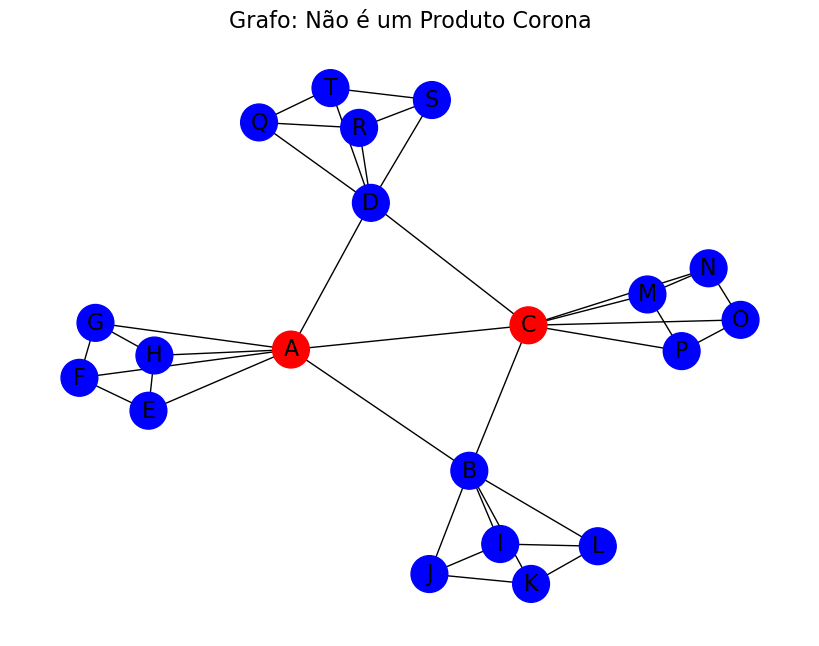

False

In [149]:
# cordal
vertices_caso3 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
grafo_caso3 = Grafo(vertices_caso3)

# Ciclo no núcleo
grafo_caso3.adicionar_aresta('A', 'B')
grafo_caso3.adicionar_aresta('A', 'C')
grafo_caso3.adicionar_aresta('B', 'C')
grafo_caso3.adicionar_aresta('C', 'D')
grafo_caso3.adicionar_aresta('D', 'A')


# Cópia do vértice A
grafo_caso3.adicionar_aresta('A', 'E')
grafo_caso3.adicionar_aresta('A', 'F')
grafo_caso3.adicionar_aresta('A', 'G')
grafo_caso3.adicionar_aresta('A', 'H')
grafo_caso3.adicionar_aresta('E', 'F')
grafo_caso3.adicionar_aresta('F', 'G')
grafo_caso3.adicionar_aresta('G', 'H')
grafo_caso3.adicionar_aresta('H', 'E')

# Cópia do vértice B
grafo_caso3.adicionar_aresta('B', 'I')
grafo_caso3.adicionar_aresta('B', 'J')
grafo_caso3.adicionar_aresta('B', 'K')
grafo_caso3.adicionar_aresta('B', 'L')
grafo_caso3.adicionar_aresta('I', 'J')
grafo_caso3.adicionar_aresta('J', 'K')
grafo_caso3.adicionar_aresta('K', 'L')
grafo_caso3.adicionar_aresta('L', 'I')

# Cópia do vértice C
grafo_caso3.adicionar_aresta('C', 'M')
grafo_caso3.adicionar_aresta('C', 'N')
grafo_caso3.adicionar_aresta('C', 'O')
grafo_caso3.adicionar_aresta('C', 'P')
grafo_caso3.adicionar_aresta('M', 'N')
grafo_caso3.adicionar_aresta('N', 'O')
grafo_caso3.adicionar_aresta('O', 'P')
grafo_caso3.adicionar_aresta('P', 'M')

# Cópia do vértice D
grafo_caso3.adicionar_aresta('D', 'Q')
grafo_caso3.adicionar_aresta('D', 'R')
grafo_caso3.adicionar_aresta('D', 'S')
grafo_caso3.adicionar_aresta('D', 'T')
grafo_caso3.adicionar_aresta('Q', 'R')
grafo_caso3.adicionar_aresta('R', 'S')
grafo_caso3.adicionar_aresta('S', 'T')
grafo_caso3.adicionar_aresta('T', 'Q')

# Verificação do produto corona para o caso 3
print("Caso 3: Ciclo de 4 no núcleo e ciclo de 4 na cópia")
produto_corona(grafo_caso3)

